In [1]:
import sys
sys.path.append('..')
import acalib
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
c = acalib.Container()
c.load_fits('../../bindata/fits/cubes/Orion.methanol.cbc.contsub.image.fits')
cube = c.primary

#Better results with threshold

rms = acalib.estimate_rms(cube)
cube = acalib.denoise(cube, threshold=rms)

INFO:astropy:Processing HDU 0 (Image)


INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO

INFO:astropy:4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES


: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


In [26]:
#Creating Spectra Sketcher
ss = acalib.algorithms.SpectraSketcher(cube)

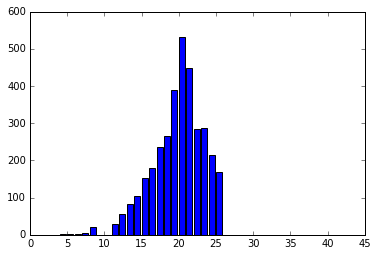

[slice(3, 9, None), slice(11, 26, None)]

In [27]:
#Creating spectra sketch
spectra,slices = ss.cube_spectra((xs*ys)/10)

#Getting frecuencies
xs = cube.data.shape[1]
ys = cube.data.shape[2]
frecs_len = cube.data.shape[0]
frecs = range(frecs_len)

#Plotting spectra
plt.bar(frecs,spectra)
plt.show()
slices

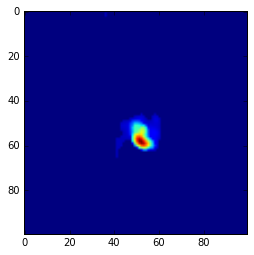

In [28]:
img = ss.vel_stacking(slices[0])
plt.imshow(img.data)
plt.show()

In [29]:
rd = acalib.algorithms.GaussianSegmentation(0.3, 10/100)
objects, images = rd.gaussian_mix(img,True)
objects.show_in_notebook()

RA,DEC
83.809382743,-5.37634223905


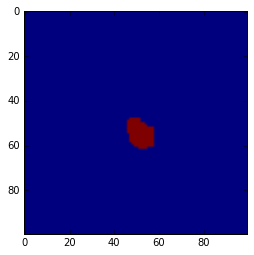

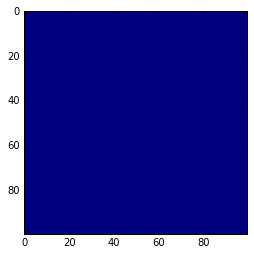

In [30]:
for i in range(len(images)):
    plt.imshow(images[i].data)
    plt.show()